# Assignment - Linear Regression   
## Made by: Sachin Katiyar

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading and understanding of data and its structure

In [2]:
#Reading CarPrice_Assignment.csv file and storing it in car_df dataframe.
car_df=pd.read_csv(r'CarPrice_Assignment.csv')
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Removing car_ID column as it is of no use
car_df=car_df.drop(['car_ID'],axis=1)

#Taking only first word in CarName column as mentioned in the question (i.e. car company name)
car_df["CarName"]= car_df["CarName"].astype(str) 
car_df["CarName"]= car_df["CarName"].str.split(" ", 1) 
car_df["CarName"]= car_df["CarName"].str.get(0) 

In [4]:
#Printing Size of car_df dataframe
car_df.shape

(205, 25)

#### Now moving towards checking of NULL values in dataframe

In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

#### Null values are not present in any of the columns

In [6]:
# Describing the dataframe
car_df.describe()

# Below description shows significant difference between mean and median of price column. 
# Also mean value is much nearer to the min value and much far from max value. Same can be seen in 75% row value i.e. 75% price value
# is smaller than 16503 and remaning 25% is between 16503 and 45400. 

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
# Checking unique values in categorical column of dataframe
# Since All categorical column comes under object type, we have taken unique on all those columns
cat_list=[]
print(car_df.select_dtypes('object').nunique())

# Selecting all categorical columns in cat_list. Symboling is also a categorical variable but not comes under object type thus adding it manually.
cat_list = list(car_df.select_dtypes('object').columns)
cat_list.insert(0,'symboling')

CarName           28
fueltype           2
aspiration         2
doornumber         2
carbody            5
drivewheel         3
enginelocation     2
enginetype         7
cylindernumber     7
fuelsystem         8
dtype: int64


In [8]:
#Printing all the unique values of each categorical column
for col in cat_list:
    print(col + '= ',end="")
    print (car_df.loc[:,col].unique())
    print(end="\n")

symboling= [ 3  1  2  0 -1 -2]

CarName= ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']

fueltype= ['gas' 'diesel']

aspiration= ['std' 'turbo']

doornumber= ['two' 'four']

carbody= ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

drivewheel= ['rwd' 'fwd' '4wd']

enginelocation= ['front' 'rear']

enginetype= ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']

cylindernumber= ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']

fuelsystem= ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']



## Data Cleaning and Preparation

In [9]:
#Since there are typing errors during insertion of car company name, therefore replacing names with actual car company names.
dictionary={'maxda':'mazda','Nissan':'nissan','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'}
car_df=car_df.replace({"CarName":dictionary})
print('CarName = ',end="")
print (car_df['CarName'].unique())

CarName = ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [10]:
#Again checking for unique values after data correction. Before CarName column contains 28 unique values, now it got reduced to 22.
print(car_df.select_dtypes('object').nunique())

CarName           22
fueltype           2
aspiration         2
doornumber         2
carbody            5
drivewheel         3
enginelocation     2
enginetype         7
cylindernumber     7
fuelsystem         8
dtype: int64


## Visualizing the data

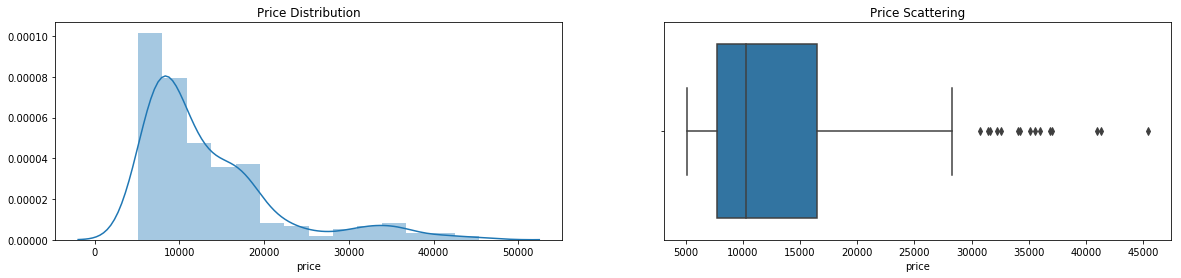

In [11]:
# Checking distribution and scattering range of price column.
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.title("Price Distribution")
sns.distplot(car_df["price"])
plt.subplot(1,2,2)
plt.title("Price Scattering")
sns.boxplot(car_df["price"])
plt.show()

#### Since tail on right is much longer than the left therefore we can say graph is right skewed and most of the values lies below 16000.

### Analyzing Categorical columns

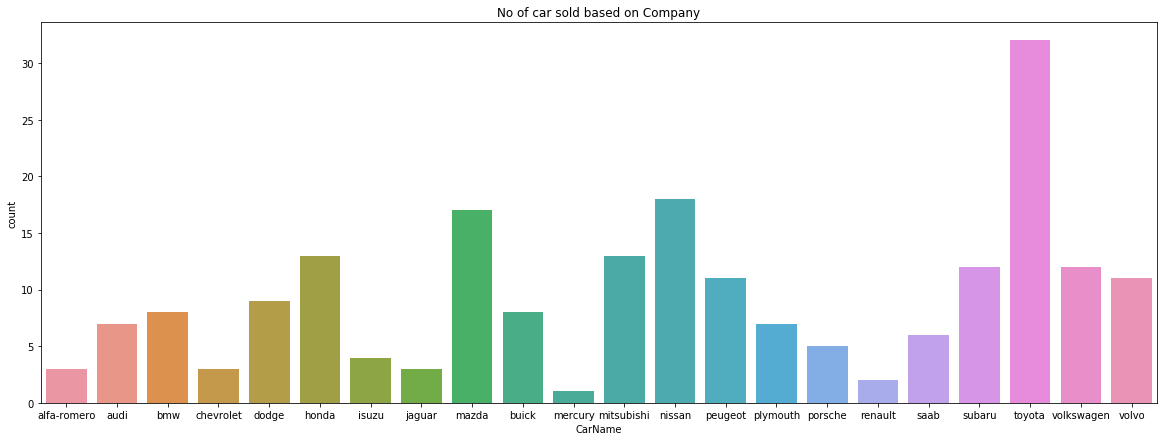

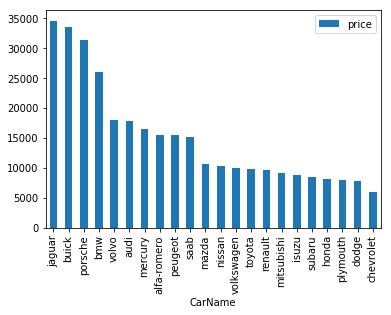

In [12]:
# Bar graph to show which car company was most preferred in American Market.
plt.figure(figsize=(20,7))
sns.countplot("CarName", data=car_df)
plt.title("No of car sold based on Company")
plt.show()
df_mean = pd.DataFrame(round(car_df.groupby('CarName')['price'].mean().sort_values(ascending=False),2))
df_mean.plot.bar();

#### Toyota is most preferred car company in Amercian Market.  Jaguar, Buick and Porsche are selling most expensive cars.

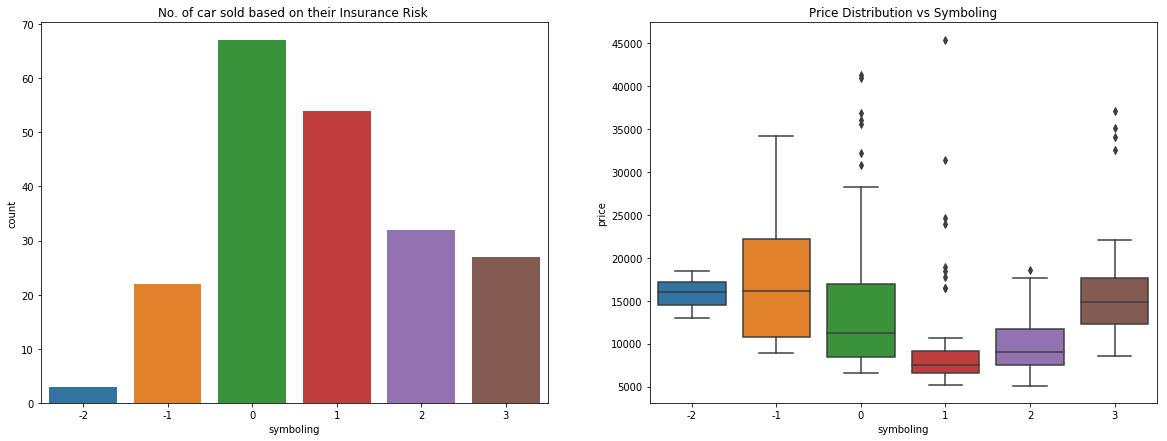

In [13]:
# Bar Graph to show which type of insurance rating is much preferred over others. 
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title("No. of car sold based on their Insurance Risk ")
sns.countplot(car_df["symboling"])
# Box plot to show distribution of price vs symboling.
plt.subplot(1,2,2)
plt.title("Price Distribution vs Symboling")
sns.boxplot(x=car_df["symboling"],y=car_df["price"])
plt.show()

#### Car with 0 and 1 symboling are sold most based on provided data.
#### Car with -1 symboling are costlier (as insurance rating is good). But car with 3 and -2 symboling shows same price range which seems not right.
#### Since symboling 3 is not a good insurance rating, price range should decrease on moving from 0 to 3 but here it shows increasing which doesn't seems right. Cannot be considerd for model preparation.

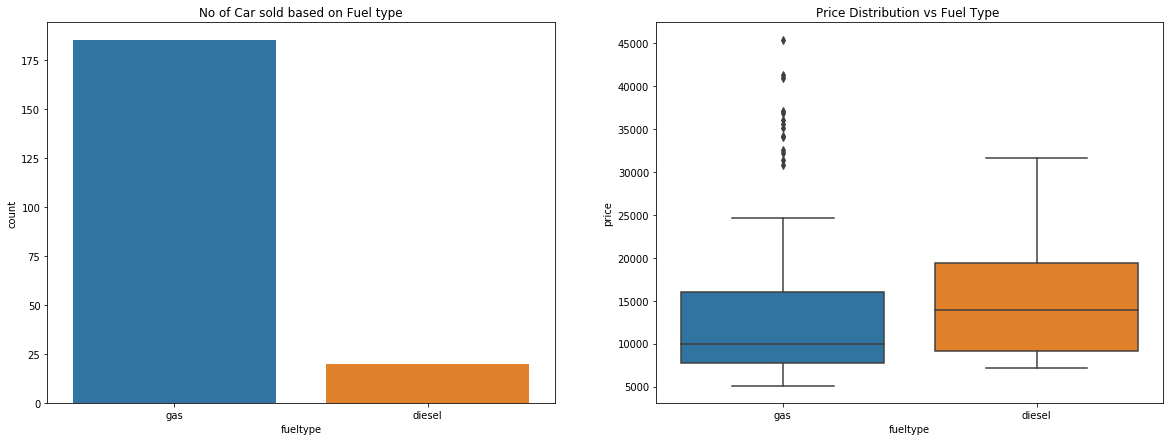

In [14]:
#Bar Graph to show which type of fuel is much preferred in cars.
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title("No of Car sold based on Fuel type")
sns.countplot(car_df["fueltype"])
# Box plot to show distribution of price vs Fuel type.
plt.subplot(1,2,2)
plt.title("Price Distribution vs Fuel Type ")
sns.boxplot(x=car_df["fueltype"],y=car_df["price"])
plt.show()

#### No of gas fueled cars are much more than diesel fueled cars. Also diesel fueled cars are costlier than gas fuel cars. Considered for model prepartion.


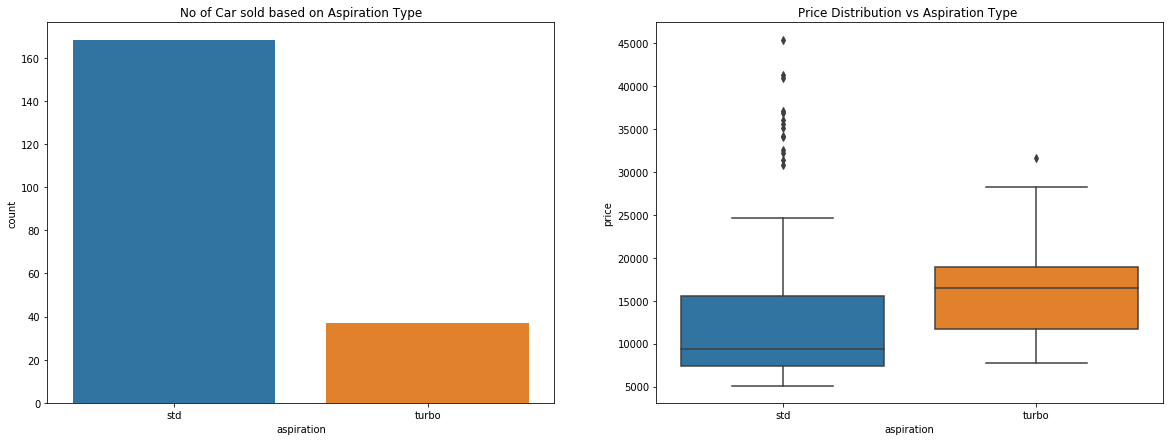

In [15]:
#Bar Graph to show which type of aspiration is much preferred in cars.
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title("No of Car sold based on Aspiration Type")
sns.countplot(car_df["aspiration"])
# Box plot to show distribution of price vs aspiration type.
plt.subplot(1,2,2)
plt.title("Price Distribution vs Aspiration Type ")
sns.boxplot(x=car_df["aspiration"],y=car_df["price"])
plt.show()

#### std aspiration type is much preferred over turbo. Also std price range is lower than the turbo price range. Considered for model prepartion.

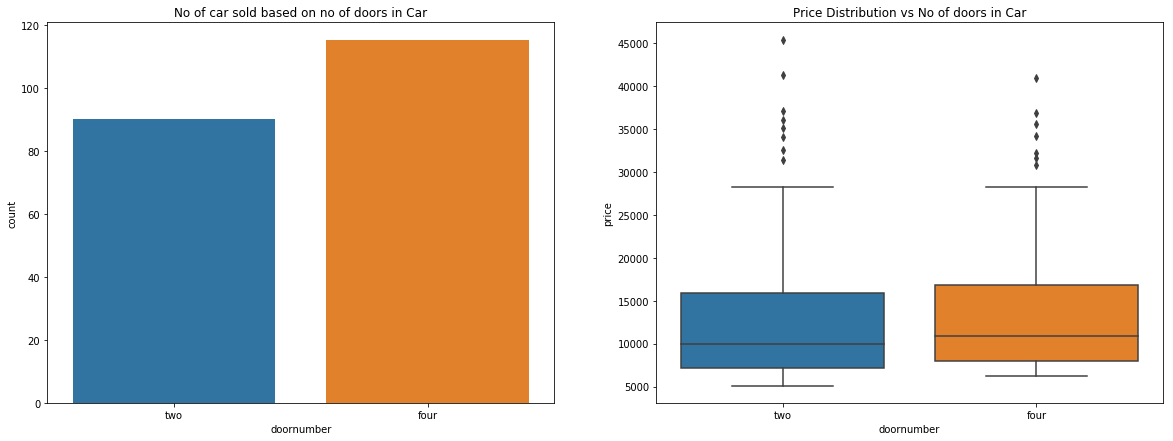

In [16]:
#Bar Graph to show what no of doors are much preferred in cars.
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title("No of car sold based on no of doors in Car")
sns.countplot(car_df["doornumber"])
# Box plot to show distribution of price vs no of doors in car.
plt.subplot(1,2,2)
plt.title("Price Distribution vs No of doors in Car")
sns.boxplot(x=car_df["doornumber"],y=car_df["price"])
plt.show()

#### Four doors in a car is much preferred over two but price range seems same for both of them. Cannot be considered for model preparation.

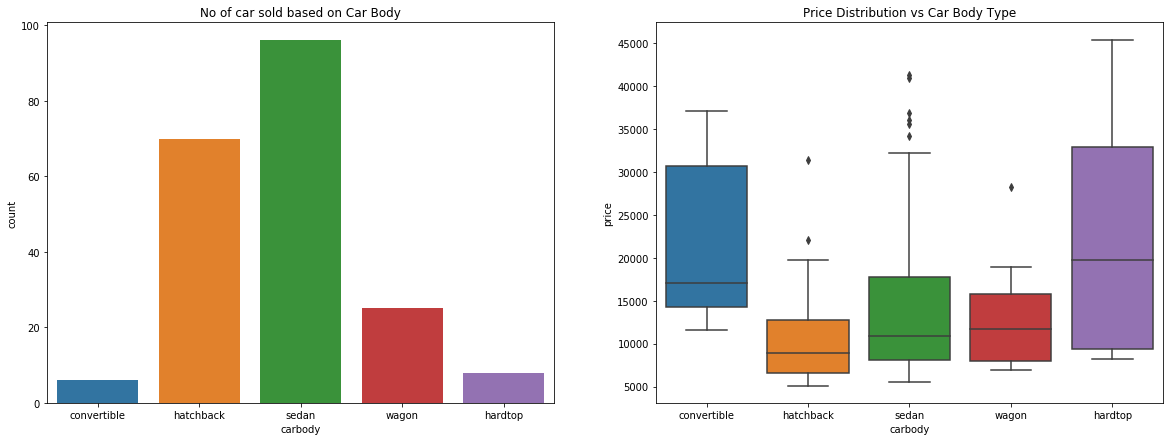

In [17]:
#Bar Graph to show what type of carbody is much preferred in cars.
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title("No of car sold based on Car Body")
sns.countplot(car_df["carbody"])
# Box plot to show distribution of price vs car body type.
plt.subplot(1,2,2)
plt.title("Price Distribution vs Car Body Type")
sns.boxplot(x=car_df["carbody"],y=car_df["price"])
plt.show()

#### sedan carbody is much preferred following hatchback. Also sedan and hatchback car body price range is lower than convertible and hardtop car body price range. Considered for model preparation.

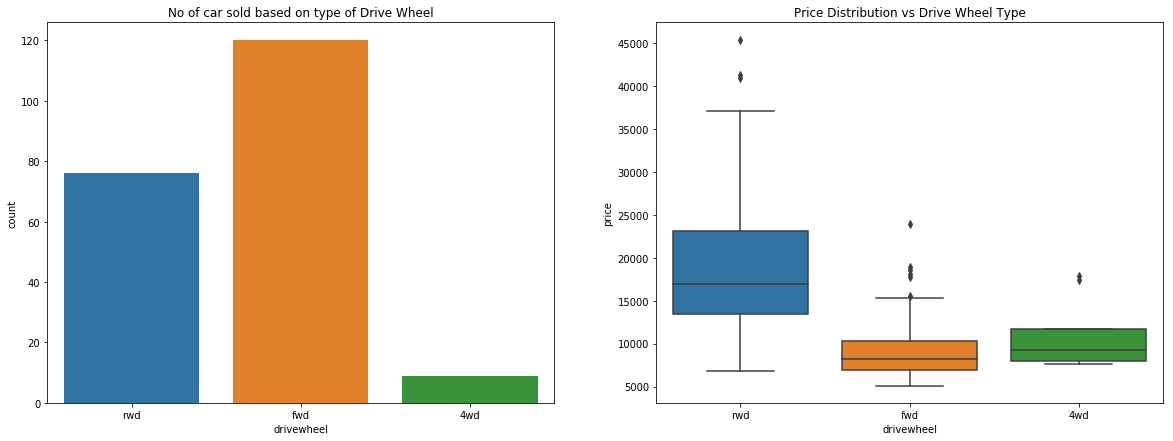

In [18]:
#Bar Graph to show location where drivewheel is much preferred in cars.
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title("No of car sold based on type of Drive Wheel")
sns.countplot(car_df["drivewheel"])
# Box plot to show distribution of price vs drive wheel type.
plt.subplot(1,2,2)
plt.title("Price Distribution vs Drive Wheel Type")
sns.boxplot(x=car_df["drivewheel"],y=car_df["price"])
plt.show()

#### fwd drive wheel is much preferred over rwd and 4wd. rwd has much high range and is preferred by high ranged cars. Considered for model preparation.

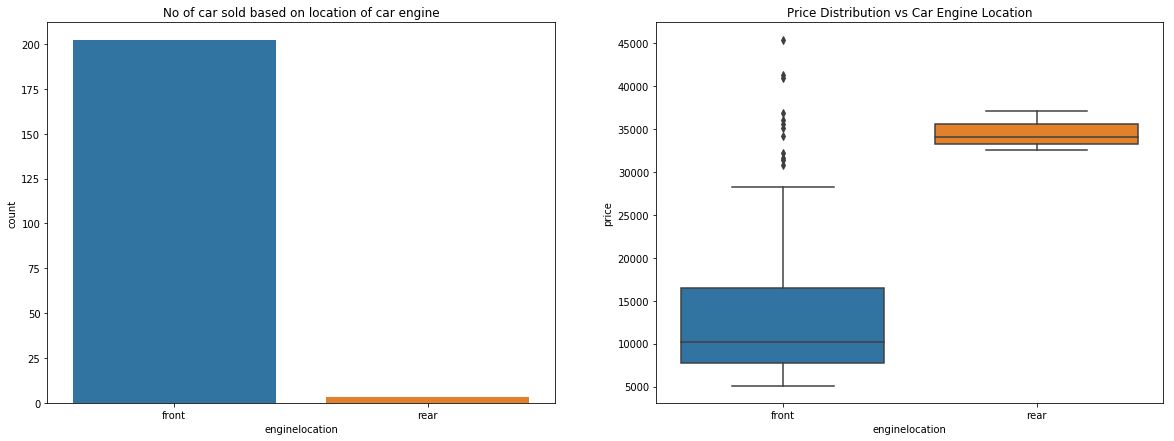

In [19]:
#Bar Graph to show location where car engine is much preferred.
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title("No of car sold based on location of car engine")
sns.countplot(car_df["enginelocation"])
# Box plot to show distribution of price vs car engine type.
plt.subplot(1,2,2)
plt.title("Price Distribution vs Car Engine Location")
sns.boxplot(x=car_df["enginelocation"],y=car_df["price"])
plt.show()

#### very less data points for rear engine location, cannot be taken for model preparation.

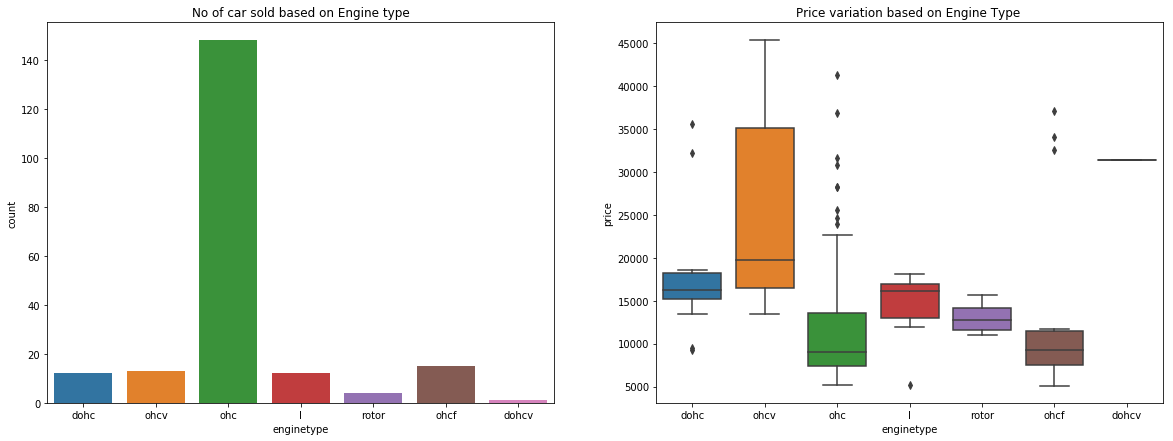

In [20]:
#Bar Graph to show which type of engine is much preferred in cars.
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title("No of car sold based on Engine type")
sns.countplot(car_df["enginetype"])
# Box plot to show distribution of price vs engine type.
plt.subplot(1,2,2)
plt.title("Price variation based on Engine Type ")
sns.boxplot(x=car_df["enginetype"],y=car_df["price"])
plt.show()

#### ohc is most preferred as its price range is less in compared to others. ohcv has highest price range while dohcv has only one row. Considered for model preparation.

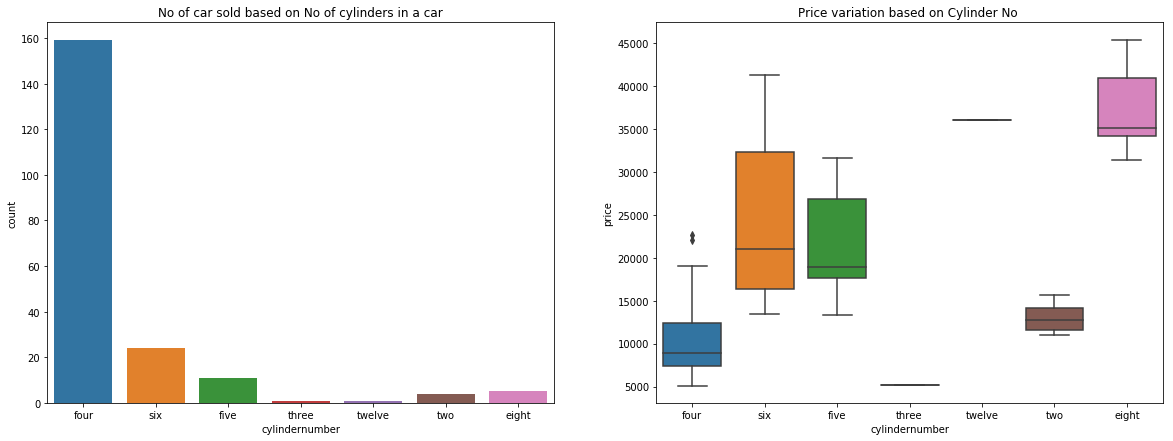

In [21]:
#Bar Graph to show no of cylinders preferred in cars.
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title("No of car sold based on No of cylinders in a car")
sns.countplot(car_df["cylindernumber"])
# Box plot to show distribution of price vs cylinder number.
plt.subplot(1,2,2)
plt.title("Price variation based on Cylinder No ")
sns.boxplot(x=car_df["cylindernumber"],y=car_df["price"])
plt.show()

#### four cylinder are preferred over five, six or eight. three and twelve having only one row each. As the no of cylinder increases, price range increases (except for no two). Can be considered for model preparation.

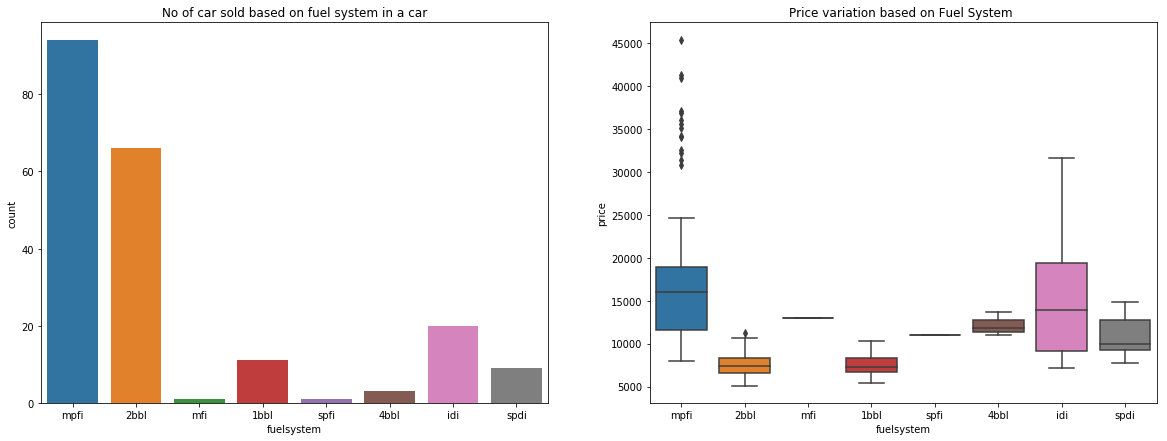

In [22]:
#Bar Graph to show which type of fuel system is much preferred in cars.
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.title("No of car sold based on fuel system in a car")
sns.countplot(car_df["fuelsystem"])
# Box plot to show distribution of price vs Fuel system type.
plt.subplot(1,2,2)
plt.title("Price variation based on Fuel System ")
sns.boxplot(x=car_df["fuelsystem"],y=car_df["price"])
plt.show()

#### mpfi and 2bbi are commonly preferred car fuel systems. mpfi and idi have high price range. Considered for model preparation.

### Bivarivate analysis for Numerical columns vs Price

In [23]:
# Showing correleation of numerical columns with price column.
correlation=car_df.corr()
print(correlation['price'])

symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64


#### wheelbase, carlength, carwidth, curbweight, enginesize, boreratio and horsepower are positively correlated with price.
#### citympg and highwaympg are negatively correlated with price.

In [24]:
# Deriving a new varibale price range which will tell us that in which price range car company lies.(High, Medium or Low)
df = car_df.copy()
table = round(df.groupby(['CarName'])['price'].mean(),2)
df = df.merge(table.reset_index(), how='left',on='CarName')
bins = [0,10000,20000,40000]
car_bin=['Low_Range','Medium_Range','High_Range']
car_df['pricerange'] = pd.cut(df['price_y'],bins,right=False,labels=car_bin)
car_df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,pricerange
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,Medium_Range
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,Medium_Range
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,Medium_Range
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,Medium_Range
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,Medium_Range


In [25]:
#final_df dataframe contains all columns from which we will start our model making
final_df = car_df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower','citympg', 'highwaympg','carlength','carwidth', 'pricerange']]
final_df.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,pricerange
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,21,27,168.8,64.1,Medium_Range
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,21,27,168.8,64.1,Medium_Range
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,19,26,171.2,65.5,Medium_Range
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,24,30,176.6,66.2,Medium_Range
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,18,22,176.6,66.4,Medium_Range


In [26]:
#Dummy variables implementation for selected categorical variables.
def dum_implmt(column,df):
    df_temp = pd.get_dummies(df[column], drop_first = True)
    df = pd.concat([df, df_temp], axis = 1)
    df.drop([column], axis = 1, inplace = True)
    return df

final_df = dum_implmt('fueltype',final_df)
final_df = dum_implmt('aspiration',final_df)
final_df = dum_implmt('carbody',final_df)
final_df = dum_implmt('drivewheel',final_df)
final_df = dum_implmt('enginetype',final_df)
final_df = dum_implmt('cylindernumber',final_df)
final_df = dum_implmt('pricerange',final_df)

In [27]:
#total columns after dummy variable implementation
print(final_df.columns)

Index(['price', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'citympg', 'highwaympg', 'carlength', 'carwidth', 'gas',
       'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six',
       'three', 'twelve', 'two', 'Medium_Range', 'High_Range'],
      dtype='object')


In [28]:
#Splitting test and train set (70% train set and 30% test set)
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(final_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [29]:
#Scaling all the numerical variables except dummy variables
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

scaling = MinMaxScaler()
tot_col = ['price','wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','citympg','highwaympg','carlength','carwidth']
df_train[tot_col] = scaling.fit_transform(df_train[tot_col])
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,...,ohcv,rotor,five,four,six,three,twelve,two,Medium_Range,High_Range
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.500000,0.567568,0.426016,0.291667,...,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.166667,0.270270,0.452033,0.666667,...,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.361111,0.324324,0.448780,0.308333,...,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.222222,0.270270,0.450407,0.316667,...,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.111111,0.135135,0.775610,0.575000,...,0,0,0,1,0,0,0,0,1,0


In [30]:
#Segregating dependent and independent variable from dataframe into y_train and X_train respectively. 
y_train = df_train.pop('price')
X_train = df_train

In [31]:
#Importing libraries for RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
#Finding the 10 most significant variables from independent dataset.
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)
rfe = RFE(lin_model, 10)
rfe = rfe.fit(X_train, y_train)

In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 2),
 ('curbweight', True, 1),
 ('enginesize', False, 14),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('citympg', False, 17),
 ('highwaympg', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('gas', False, 18),
 ('turbo', False, 21),
 ('hardtop', False, 3),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 15),
 ('rwd', False, 16),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 20),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 13),
 ('twelve', True, 1),
 ('two', False, 22),
 ('Medium_Range', False, 12),
 ('High_Range', True, 1)]

In [34]:
X_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'highwaympg', 'carwidth', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'twelve', 'High_Range'],
      dtype='object')

### Building model using statsmodels for detailed analysis

In [35]:
X_train_final_rfe = X_train[X_train.columns[rfe.support_]]
X_train_final_rfe.head()

,curbweight,horsepower,highwaympg,carwidth,hatchback,sedan,wagon,dohcv,twelve,High_Range
122,0.272692,0.083333,0.567568,0.291667,0,1,0,0,0,0
125,0.500388,0.395833,0.270270,0.666667,1,0,0,0,0,1
166,0.314973,0.266667,0.324324,0.308333,1,0,0,0,0,0
1,0.411171,0.262500,0.270270,0.316667,0,0,0,0,0,0
199,0.647401,0.475000,0.135135,0.575000,0,0,1,0,0,0


### MODEL 1

In [36]:
import statsmodels.api as sm
X_train_final_rfe = sm.add_constant(X_train_final_rfe)

In [37]:
lin_model = sm.OLS(y_train,X_train_final_rfe).fit()

In [38]:
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     171.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.58e-70
Time:                        20:15:20   Log-Likelihood:                 205.62
No. Observations:                 143   AIC:                            -389.2
Df Residuals:                     132   BIC:                            -356.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0928      0.043     -2.146      0.0

#### p-vale of highwaympg is higher than the significance value of 0.05, hence dropping it.

In [39]:
X_train_new = X_train_final_rfe.drop(["highwaympg"], axis = 1)

### MODEL 2

In [40]:
import statsmodels.api as sm
X_train_final_rfe = sm.add_constant(X_train_new)

In [41]:
lin_model = sm.OLS(y_train,X_train_final_rfe).fit()

In [42]:
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.42e-71
Time:                        20:15:20   Log-Likelihood:                 204.13
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0352      0.026     -1.338      0.1

#### p-vale of twelve is higher than the significance value of 0.05, hence dropping it.

In [43]:
X_train_new = X_train_final_rfe.drop(["twelve"], axis = 1)

### MODEL 3

In [44]:
X_train_final_rfe = sm.add_constant(X_train_new)

In [45]:
lin_model = sm.OLS(y_train,X_train_final_rfe).fit()

In [46]:
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.86e-72
Time:                        20:15:20   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [47]:
#Calculating the Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.90
1,curbweight,8.10
5,sedan,6.07
4,hatchback,5.63
3,carwidth,5.14
2,horsepower,3.61
6,wagon,3.58
8,High_Range,1.63
7,dohcv,1.46


#### Dropping curbweight column as it is having high VIF value

In [48]:
X_train_new = X_train_final_rfe.drop(["curbweight"], axis = 1)

### MODEL 4

In [49]:
X_train_final_rfe = sm.add_constant(X_train_new)

In [50]:
lin_model = sm.OLS(y_train,X_train_final_rfe).fit()

In [51]:
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.70e-70
Time:                        20:15:21   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

In [52]:
#Calculating the Variance Inflation Factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,26.89
4,sedan,6.06
3,hatchback,5.54
5,wagon,3.47
1,horsepower,2.50
2,carwidth,2.22
7,High_Range,1.56
6,dohcv,1.21


#### Dropping sedan column as it is having high VIF value

In [53]:
X_train_new = X_train_final_rfe.drop(["sedan"], axis = 1)

### MODEL 5

In [54]:
X_train_final_rfe = sm.add_constant(X_train_new)

In [55]:
lin_model = sm.OLS(y_train,X_train_final_rfe).fit()

In [56]:
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.68e-69
Time:                        20:15:21   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

#### p-vale of wagon is higher than the significance value of 0.05, hence dropping it.

In [57]:
X_train_new = X_train_final_rfe.drop(["wagon"], axis = 1)

### MODEL 6

In [58]:
X_train_final_rfe = sm.add_constant(X_train_new)

In [59]:
lin_model = sm.OLS(y_train,X_train_final_rfe).fit()

In [60]:
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.57e-70
Time:                        20:15:21   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

#### Dropping dohcv column as only one value is present in dataframe which will not lead to any significant result.

In [61]:
X_train_new = X_train_final_rfe.drop(["dohcv"], axis = 1)

### MODEL 7

In [62]:
X_train_final_rfe = sm.add_constant(X_train_new)

In [63]:
lin_model = sm.OLS(y_train,X_train_final_rfe).fit()

In [64]:
print(lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.04e-67
Time:                        20:15:22   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

In [65]:
#Calculating the Variance Inflation Factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.04
1,horsepower,2.22
2,carwidth,2.08
4,High_Range,1.53
3,hatchback,1.10


### Residual Analysis of the train data
#### Plotting histogram of the error terms to check if the error terms are also normally distributed.

In [66]:
y_train_predict = lin_model.predict(X_train_final_rfe)

Text(0.5, 0, 'Errors')

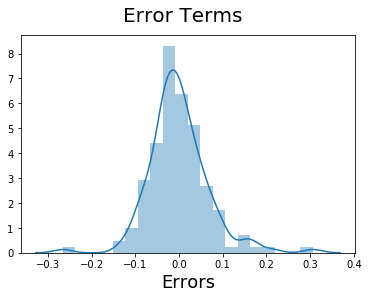

In [67]:
# Plotting histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

## Making Predictions

In [68]:
#Scaling on the test set
tot_col = ['price','wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','citympg','highwaympg','carlength','carwidth']
df_test[tot_col] = scaling.fit_transform(df_test[tot_col])
df_test.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,...,ohcv,rotor,five,four,six,three,twelve,two,Medium_Range,High_Range
160,0.058474,0.265306,0.132148,0.082969,0.515873,0.116129,1.000000,1.000000,0.341732,0.200000,...,0,0,0,1,0,0,0,0,0,0
186,0.077398,0.311953,0.219125,0.131004,0.515873,0.212903,0.541667,0.580645,0.426772,0.315789,...,0,0,0,1,0,0,0,0,1,0
59,0.086148,0.355685,0.271985,0.187773,0.674603,0.206452,0.500000,0.516129,0.522835,0.421053,...,0,0,0,1,0,0,0,0,1,0
165,0.097473,0.230321,0.214320,0.082969,0.555556,0.387097,0.500000,0.419355,0.379528,0.157895,...,0,0,0,1,0,0,0,0,0,0
140,0.055099,0.195335,0.202307,0.126638,0.857143,0.135484,0.500000,0.483871,0.200000,0.136842,...,0,0,0,1,0,0,0,0,0,0


In [69]:
#Segregating dependent and independent variable from dataframe into y_test and X_test respectively.
y_test = df_test.pop('price')
X_test = df_test

In [70]:
# Dropping const variable for procedding towards making prediction. 
X_train_new = X_train_new.drop('const',axis=1)

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable to X_test_new
X_test_new = sm.add_constant(X_test_new)

In [71]:
# Making Predictions
y_pred = lin_model.predict(X_test_new)

In [72]:
#Calculating R-squared score on the test set.
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8614575410189547

## Model Evaluation

Text(0, 0.5, 'y_pred')

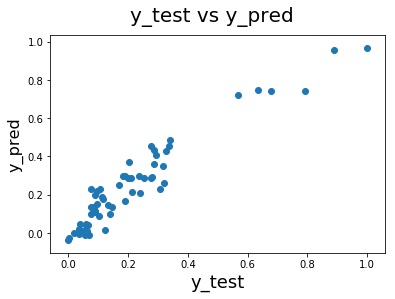

In [73]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

#### R-squared and Adjusted R-squared coming out to be 0.899 and 0.896 respectively, i.e. 90% variance is explained
#### F-stats and Prob(F-stats) coming out to be 308.0 and 1.04e-67(approx. 0.0) respectively i.e. Model fit is significant and explained 90% variance is just not by chance.
#### p-values for all the coefficientsis less than significance level of 0.05 which means that all the predictors are statistically significant